In [9]:
# imports basics
import pandas as pd
import numpy as np

# ml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier ## model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# variables
train_path = '/kaggle/input/playground-series-s4e10/train.csv'
test_path = '/kaggle/input/playground-series-s4e10/test.csv'
subm_path = '/kaggle/input/playground-series-s4e10/sample_submission.csv'
original_path = '/kaggle/input/total-dataset-wonans/total_data.csv'

seed = 102
kf = KFold(n_splits=2)
kfs = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

stack_stimators = [
    ('cat', CatBoostClassifier(logging_level='Silent')), 
    ('xgb', XGBClassifier(device='cpu')), 
    ('lgb', LGBMClassifier(verbose=0))]

clf_stack = StackingClassifier(estimators=stack_stimators)

In [3]:
df_train = pd.read_csv(train_path).drop('id', axis=1)
df_subm = pd.read_csv(subm_path)
df_test = pd.read_csv(test_path).drop('id', axis=1)
original = pd.read_csv(original_path)
list(original.columns)

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'loan_status']

In [6]:
df_test.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39093,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4
39097,31,45000,RENT,6.0,DEBTCONSOLIDATION,B,19450,9.91,0.44,N,9


In [4]:
original.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
91221,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
91222,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
91223,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
91224,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0
91225,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0.15,N,30,0


In [7]:
# df_train_total = pd.concat([original, df_train])
# df_train_total = df_train_total.fillna(0).drop('id', axis=1)
# df_train_total
df_train.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [8]:
#X = df_train_total.iloc[:, 1:-1] # features
#y = df_train_total.iloc[:, -1] # target

X = df_train.drop('loan_status', axis=1)
y = df_train['loan_status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=seed)

In [11]:
num_cols = X_train.select_dtypes(exclude=['object']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns


# PIPELINE
num_pipe = Pipeline(
    steps=[('scaler', MinMaxScaler())
     
    ]
)

cat_pipe = Pipeline(
    steps=[('encoder', OneHotEncoder())
     
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_pipe, num_cols),
        ('categorical', cat_pipe, cat_cols)
    ]
)


pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('modelo', clf_stack)
    ]
)

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['perso...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...)),
                                                ('lgb',
                                                 LGBMClassifier(verbose=0))]))])

**what happens if you change the cross-val model?**

In [12]:
# k-fold cv
scores = cross_val_score(
    pipe, X_train, y_train, cv=kfs, scoring='roc_auc', verbose=10)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.957) total time=  55.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   55.9s


[CV] END ................................ score: (test=0.955) total time=  56.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.956) total time=  55.6s


**hpo**

In [13]:
## gridsearch 
stack_params = {
    'modelo__xgb__booster': ['gblinear', 'dart']
}

random_search = RandomizedSearchCV(
    pipe, param_distributions=stack_params, random_state=seed, 
    cv=kfs, scoring='roc_auc', verbose=100, n_iter=100)

random_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START modelo__xgb__booster=gblinear...............................
[CV 1/3; 1/2] END modelo__xgb__booster=gblinear;, score=0.956 total time=  57.0s
[CV 2/3; 1/2] START modelo__xgb__booster=gblinear...............................
[CV 2/3; 1/2] END modelo__xgb__booster=gblinear;, score=0.953 total time=  57.1s
[CV 3/3; 1/2] START modelo__xgb__booster=gblinear...............................
[CV 3/3; 1/2] END modelo__xgb__booster=gblinear;, score=0.954 total time=  57.2s
[CV 1/3; 2/2] START modelo__xgb__booster=dart...................................
[CV 1/3; 2/2] END ....modelo__xgb__booster=dart;, score=0.957 total time= 6.4min
[CV 2/3; 2/2] START modelo__xgb__booster=dart...................................
[CV 2/3; 2/2] END ....modelo__xgb__booster=dart;, score=0.955 total time= 6.4min
[CV 3/3; 2/2] START modelo__xgb__booster=dart...................................
[CV 3/3; 2/2] END ....modelo__xgb__booster=dart;, 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=102, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      d...
                                                                                            max_depth=None,
                                                                                            max_leaves=None,
                                                                                            min_child_weight=None,
                                                                                            missing=nan,
                                                                                            monotone_constraints=None,
                                                                                            multi_strategy=None,
                                                                                            n_estimators=None,
                                                                                            n_jobs=None,
                                                                                            num_parallel_tree=None,
                                                                                            random_state=None, ...)),
                                                                             ('lgb',
                                                                              LGBMClassifier(verbose=0))]))]),
                   n_iter=100,
                   param_distributions={'modelo__xgb__booster': ['gblinear',
                                                                 'dart']},
                   random_state=102, scoring='roc_auc', verbose=100)

In [14]:
print(random_search.best_score_)
print('###')
print(random_search.best_estimator_)
print('###')
print(random_search.best_params_)

0.9556154017343098
###
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['perso...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                   

**predictions**

In [15]:
y_hat  = random_search.predict_proba(df_test)[:, 1]
y_hat

array([0.98120999, 0.02771948, 0.77594804, ..., 0.02679606, 0.08885568,
       0.97579941])

In [16]:
df_subm['loan_status'] = y_hat
df_subm.to_csv('stack-member2.csv', index=False)
df_subm.tail()

,id,loan_status
39093,97738,0.035813
39094,97739,0.025916
39095,97740,0.026796
39096,97741,0.088856
39097,97742,0.975799


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


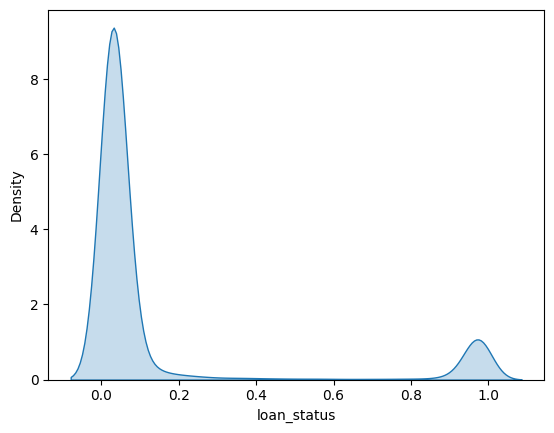

In [20]:
import seaborn as sns
sns.kdeplot(df_subm.loan_status, fill=True);